# TASK-4
# E-mail Spam Detection with Machine Learing

In [ ]:
#Importing necessarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the data set
df=pd.read_csv("spam.csv", encoding='latin_1')

In [ ]:
# get the data of the first 5 rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# EDA

In [ ]:
df.info() #Display number of rows, columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# removing unused columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1)

In [ ]:
# renaming the column names
df = df.rename(columns={'v1':'Category', 'v2': 'Message'})

In [ ]:
df.sample(6)

,Category,Message
1327,spam,Ur balance is now å£500. Ur next question is: ...
2032,ham,"Yes, i'm small kid.. And boost is the secret o..."
315,ham,K.k:)advance happy pongal.
3021,ham,How dare you change my ring
3595,ham,Good morning princess! Happy New Year!
450,ham,hanks lotsly!


In [ ]:
# count the rows and columns
df.shape

(5572, 2)

In [ ]:

df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# find out the null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

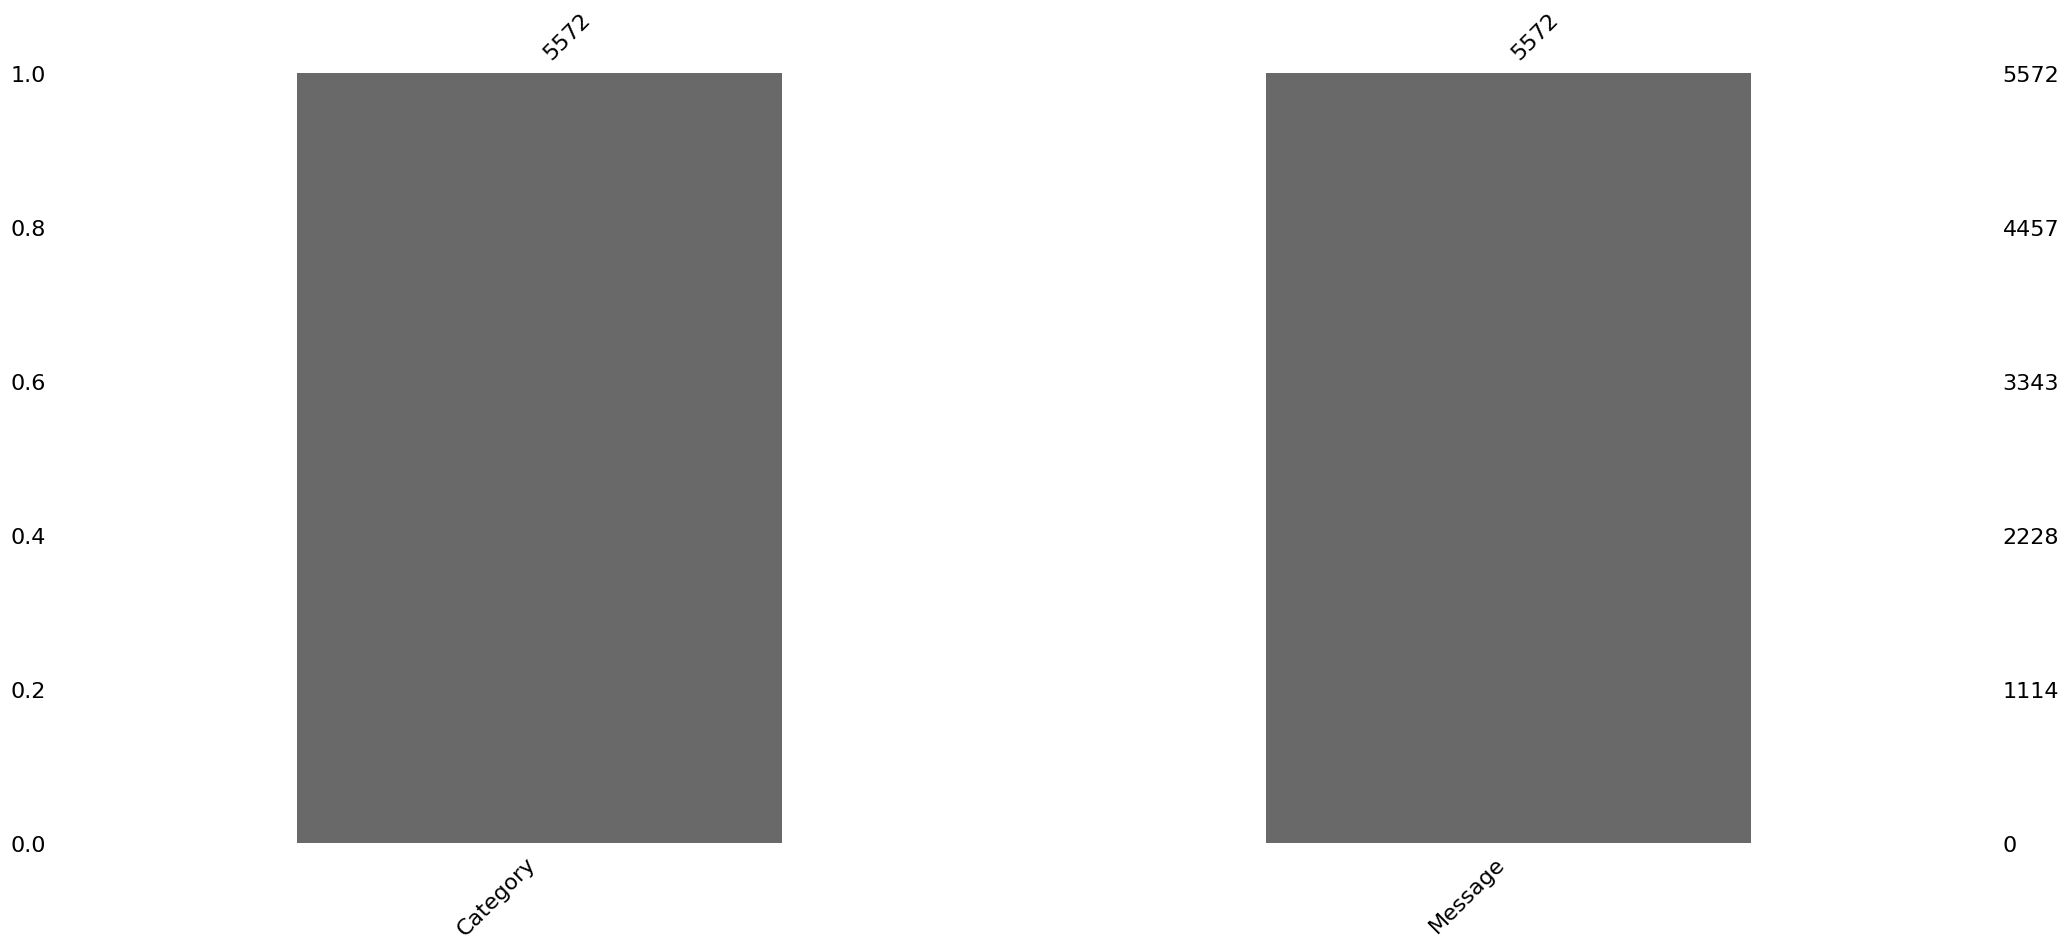

In [ ]:
# exploratory the missing values
import missingno as msno
msno.bar(df);

In [ ]:
#Finding the mean, min, max, and std deviation
df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# finding unique values count
df.nunique()

Category       2
Message     5169
dtype: int64

In [ ]:
# count number of malspam and ham
Category_count=df['Category'].value_counts()
Category_count

ham     4825
spam     747
Name: Category, dtype: int64

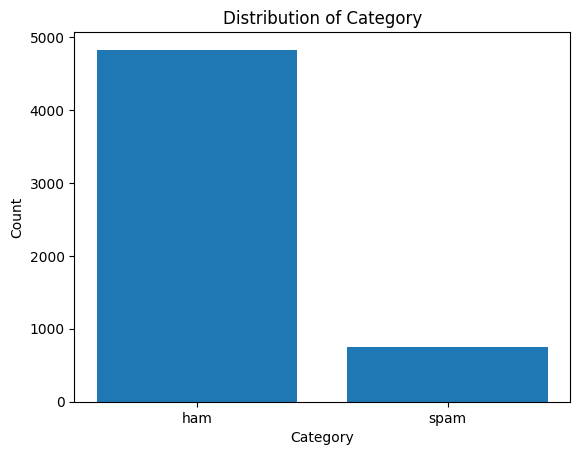

In [ ]:
#creat barpolt using Matplotlib
plt.bar(Category_count.index,Category_count.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Category')
plt.show()

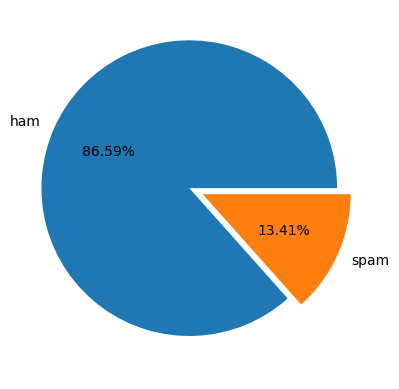

In [ ]:
# creating pie chart
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df1=[]
for i in range(0,5572):
  temp=re.sub('[^a-zA-Z]', ' ' ,df['Message'][i])
  temp=temp.lower()
  temp=temp.split()
  ps= PorterStemmer()
  all_stopwords=stopwords.words('english')
  all_stopwords.remove('not')

  temp=[ps.stem(word) for word in temp if not word in set(all_stopwords)]
  temp=' '.join(temp)
  df1.append(temp)


In [ ]:
df1

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother not like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank brea

In [ ]:
# transform a given text to CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features = 1500)
x = cv.fit_transform(df1).toarray()
y= df['Category'].values

# feature scaling

In [ ]:
# feature scaling

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("logistic regression training set:",lr.score(x_train, y_train)*100)
print("logistic regression testing set:",lr.score(x_test, y_test)*100)
print("Accuracy:", accuracy_score(y_test,y_pred)*100)

logistic regression training set: 99.3076923076923
logistic regression testing set: 98.56459330143541
Accuracy: 98.56459330143541


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1453    4]
 [  20  195]]
